In [16]:
import pandas as pd

In [17]:
file_path = 'global_health.csv'
data = pd.read_csv(file_path)


In [ ]:
data.head(), data.info()

In [19]:
missing_data = data.isnull().mean() * 100

In [20]:
descriptive_stats = data.describe()

In [21]:
outliers_check = {
    'Life_Expectancy': data['Life_Expectancy'].min(),  
    'Fertility_Rate': data['Fertility_Rate'].min(),    
    'Unemployment_Rate': data['Unemployment_Rate'].min(), 
    'Infant_Deaths': data['Infant_Deaths'].min(),       
    'GDP_Per_Capita': data['GDP_Per_Capita'].min(),     
    'Hospital_Beds_Per_1000': data['Hospital_Beds_Per_1000'].min(),  
    'Air_Pollution': data['Air_Pollution'].min(),       
    'CO2_Exposure_Percent': data['CO2_Exposure_Percent'].min()  
}
missing_data, descriptive_stats, outliers_check


(Country                            0.000000
 Country_Code                       0.000000
 Year                               0.000000
 Fertility_Rate                     1.914894
 Urban_Population_Percent           0.000000
 Total_Population                   0.000000
 Water_Access_Percent              34.840426
 Unemployment_Rate                  7.446809
 Sanitary_Expense_Per_GDP           2.446809
 Life_Expectancy                    2.127660
 Life_Expectancy_Female             2.127660
 Life_Expectancy_Male               2.127660
 Infant_Deaths                      0.531915
 GDP_Per_Capita                     1.436170
 Hospital_Beds_Per_1000            31.861702
 Female_Population                  0.000000
 Male_Population                    0.000000
 Alcohol_Consumption_Per_Capita    13.617021
 Immunization_Rate                  0.531915
 Sanitary_Expense_Per_Capita        2.500000
 CO2_Exposure_Percent              10.478723
 Air_Pollution                     10.478723
 Labour_Fo

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_data.corr()




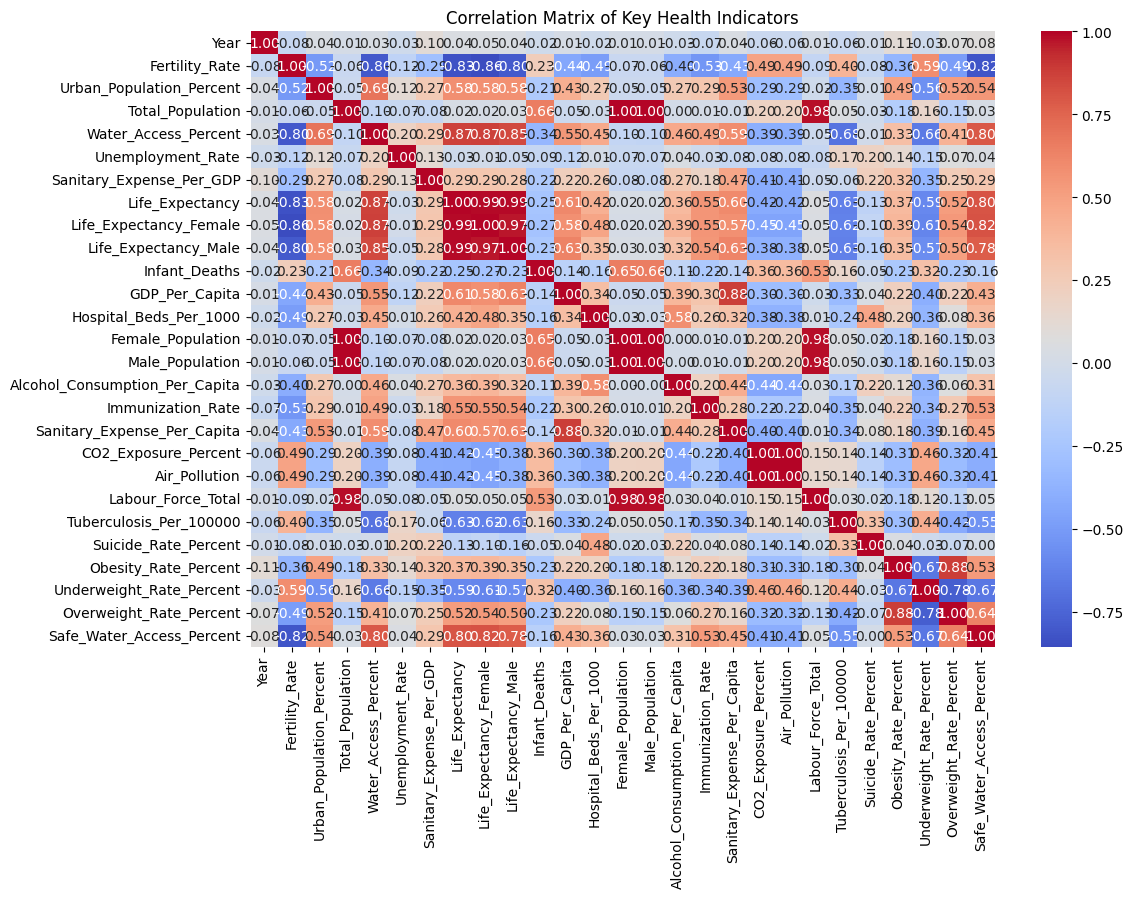

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Key Health Indicators')
plt.show()

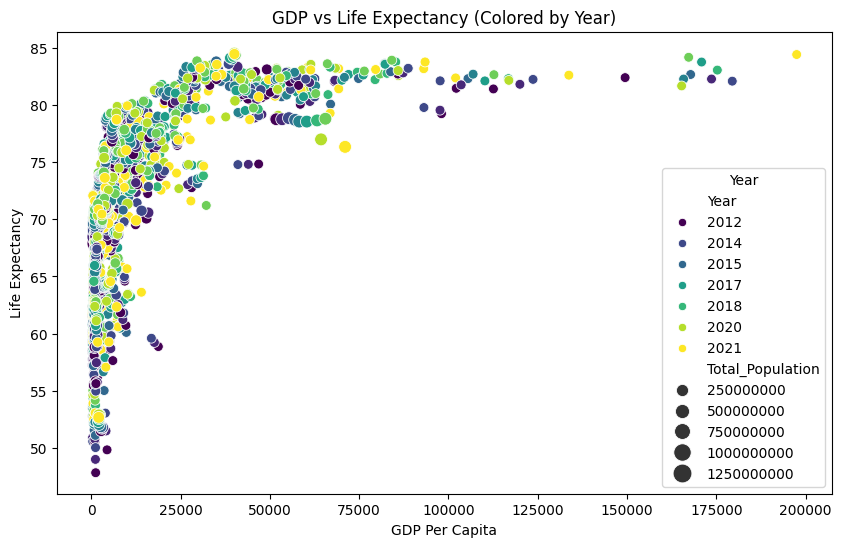

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, x='GDP_Per_Capita', y='Life_Expectancy', hue='Year',
    palette='viridis', size='Total_Population', sizes=(50, 200)
)
plt.title('GDP vs Life Expectancy (Colored by Year)')
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy')
plt.legend(title='Year')
plt.show()

In [45]:
top_countries = data.groupby('Country')['Fertility_Rate'].mean().sort_values(ascending=False).head(10).index


In [ ]:
filtered_data = data[data['Country'].isin(top_countries)]


C:\Users\baurz\AppData\Local\Temp\ipykernel_5800\3852980730.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


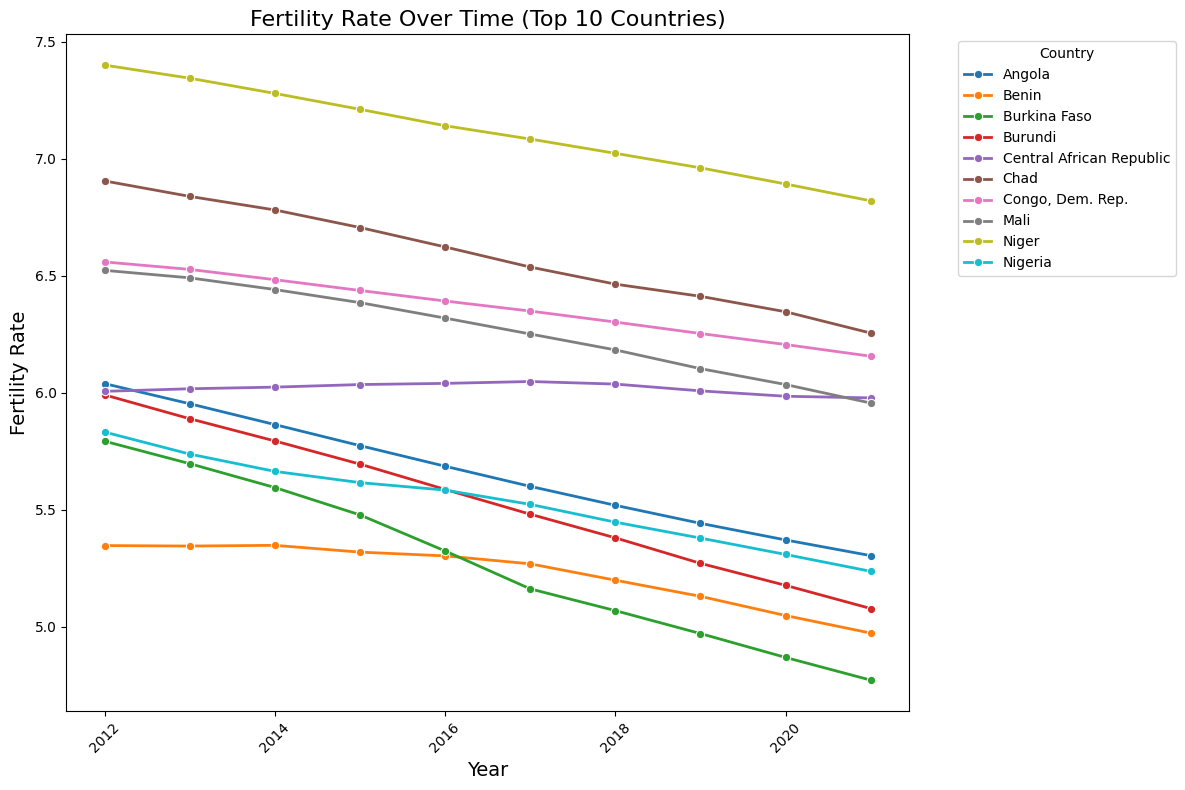

In [47]:
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=filtered_data, x='Year', y='Fertility_Rate', hue='Country',
    ci=None, estimator='mean', marker='o', lw=2, palette='tab10'
)
plt.title('Fertility Rate Over Time (Top 10 Countries)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Fertility Rate', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()

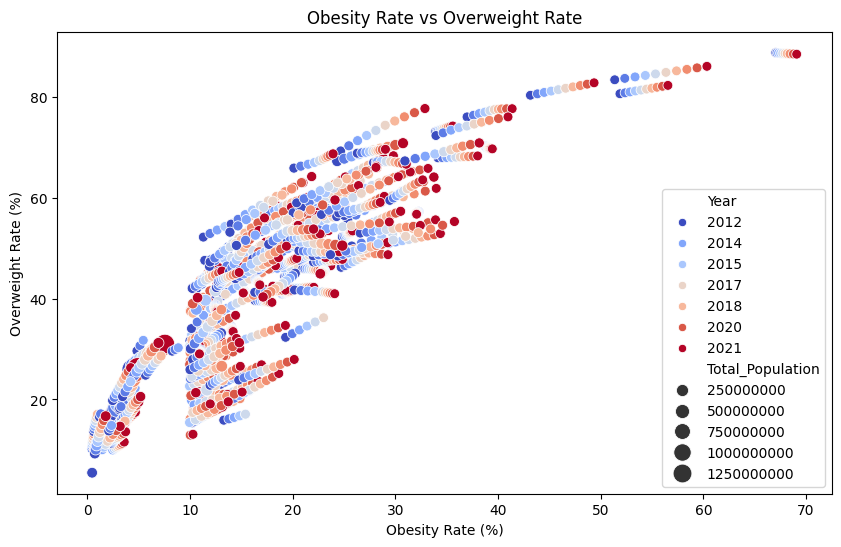

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, x='Obesity_Rate_Percent', y='Overweight_Rate_Percent', hue='Year',
    palette='coolwarm', size='Total_Population', sizes=(50, 200)
)
plt.title('Obesity Rate vs Overweight Rate')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Overweight Rate (%)')
plt.show()

In [40]:
region_mapping = {
    'Asia': ['China', 'India', 'Japan', 'South Korea', 'Indonesia', 'Pakistan', 'Bangladesh', 'Vietnam', 
             'Philippines', 'Thailand', 'Malaysia', 'Singapore', 'Sri Lanka', 'Nepal', 'Myanmar', 
             'Afghanistan', 'Kazakhstan', 'Uzbekistan', 'Iraq', 'Syria', 'Jordan', 'Lebanon', 'Yemen', 
             'Israel', 'Palestine', 'Bahrain', 'Qatar', 'Kuwait', 'Oman', 'United Arab Emirates', 
             'Saudi Arabia', 'Armenia', 'Georgia', 'Azerbaijan'],
    'Europe': ['United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'Poland', 'Romania', 'Netherlands', 
               'Belgium', 'Greece', 'Czech Republic', 'Portugal', 'Sweden', 'Hungary', 'Belarus', 'Austria', 
               'Switzerland', 'Bulgaria', 'Serbia', 'Denmark', 'Finland', 'Slovakia', 'Norway', 'Croatia', 
               'Bosnia and Herzegovina', 'Slovenia', 'North Macedonia', 'Albania', 'Lithuania', 'Latvia', 
               'Estonia', 'Ukraine', 'Moldova', 'Malta'],
    'North America': ['United States', 'Canada', 'Mexico'],
    'South America': ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru', 'Venezuela', 'Ecuador', 'Bolivia', 
                      'Paraguay', 'Uruguay', 'Guyana', 'Suriname', 'French Guiana'],
    'Africa': ['Nigeria', 'Ethiopia', 'Egypt', 'Democratic Republic of the Congo', 'Tanzania', 'South Africa', 
               'Kenya', 'Uganda', 'Sudan', 'Algeria', 'Morocco', 'Angola', 'Ghana', 'Mozambique', 'Madagascar', 
               'Cameroon', 'Côte d\'Ivoire', 'Niger', 'Burkina Faso', 'Mali', 'Malawi', 'Zambia', 'Senegal', 
               'Chad', 'Somalia', 'Zimbabwe', 'Guinea', 'Rwanda', 'Benin', 'Burundi', 'Tunisia', 'South Sudan', 
               'Togo'],
    'Oceania': ['Australia', 'New Zealand', 'Papua New Guinea', 'Fiji', 'Solomon Islands', 'Vanuatu', 'Samoa', 
                'Tonga', 'Micronesia', 'Palau', 'Marshall Islands', 'Nauru', 'Kiribati']
}

In [41]:
def assign_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'Other'

data['Region'] = data['Country'].apply(assign_region)

In [42]:
region_analysis = data.groupby('Region').agg({
    'Life_Expectancy': 'mean',
    'Fertility_Rate': 'mean',
    'GDP_Per_Capita': 'mean',
    'Infant_Deaths': 'mean',
    'Hospital_Beds_Per_1000': 'mean',
    'Unemployment_Rate': 'mean',
    'Water_Access_Percent': 'mean',
    'Alcohol_Consumption_Per_Capita': 'mean',
    'Suicide_Rate_Percent': 'mean',
    'Obesity_Rate_Percent': 'mean',
    'Underweight_Rate_Percent': 'mean',
    'Overweight_Rate_Percent': 'mean',
    'Safe_Water_Access_Percent': 'mean'
}).reset_index()


In [48]:
print(region_analysis)

          Region  Life_Expectancy  Fertility_Rate  GDP_Per_Capita  \
0         Africa        62.321038        4.609686     1633.521926   
1           Asia        74.288738        2.370959    15496.615024   
2         Europe        78.623180        1.538791    28808.498053   
3  North America        77.893866        1.795600    39294.735176   
4        Oceania        70.243837        3.212912    12776.128507   
5          Other        70.241733        2.779758    16665.654813   
6  South America        73.945455        2.185727     8733.616945   

   Infant_Deaths  Hospital_Beds_Per_1000  Unemployment_Rate  \
0   57939.506897                0.817895           6.512028   
1   61673.027586                2.569852           5.762969   
2     706.150000                5.035189           9.223969   
3   17393.666667                2.099643           5.639667   
4     999.483333                2.527500           4.365800   
5    8992.860563                3.232422           8.874848   
6    7